# SF Crime PSET 1

1. [Introduction](#intro)
2. [Getting the Data](#data)
3. [Descriptive Statistics](#stats)
4. [Geographic Information Systems](#gis)
5. [Discussion Questions](#dq)

In [1]:
# imports
import requests
from datascience import *
import matplotlib.pyplot as plt
import datetime
import folium
from folium import GeoJson
import time
import json
import os
from branca.colormap import linear
import branca.colormap
%matplotlib inline

## 1. Introduction <a id='intro'></a>

For this lab, we will be working with the San Francisco Police Department's Incident Database. The dataset contains up-to-date information on incidents reported to the SFPD. Each observation is tagged with information about the incident's location, type of infraaction, and date/time. In this lab you will:

1. Download the data through an Application Programming Interface (API)
2. Explore the data with summary and descriptive statistics
3. Map the incidents

Make sure to start early and ask lots of questions! The dataset, along with other publicaly available data, is available at: https://data.sfgov.org/Public-Safety/Police-Department-Incidents/tmnf-yvry

## 2. Getting the Data <a id='data'></a>

Write code that pulls the data into your environment with an API call. Here is the link to the API: https://data.sfgov.org/resource/PdId.json

In [2]:
# the url that we want to get our data from
#
#  ******* THIS IS THE OLD DATA PULLING CELL. DO NOT USE. USE CELL BELOW. *******
data_url = 'https://data.sfgov.org/resource/PdId.json?$limit=1&$offset=0&$order=date DESC'

# making our http request to DATA_URL
response = requests.get(data_url)
# using the built-in json decoder of the requests library to interpret the text
json_response = response.json()
len(json_response)

1

In [3]:
#ts = Table(data.labels)
offset = 0
n = 2
recs = []
while n > 0:
    print(n)
    lnk = 'https://data.sfgov.org/resource/PdId.json?$limit=50000&$offset={}&$order=date DESC'.format(str(offset))
    r = requests.get(lnk)
    js = r.json()
    recs.extend(js)
    offset += 50000
    n -= 1
len(recs)

2
1


100000

In [4]:
import pandas as pd
df = pd.DataFrame(recs)
df.head()

,address,category,date,dayofweek,descript,incidntnum,location,pddistrict,pdid,resolution,time,x,y
0,1000 Block of HARRISON ST,OTHER OFFENSES,2018-01-20T00:00:00,Saturday,TRAFFIC VIOLATION ARREST,180051238,"{'latitude': '37.7758609689912', 'human_addres...",SOUTHERN,18005123865010,"ARREST, BOOKED",00:09,-122.4059551184521,37.7758609689912
1,1000 Block of HARRISON ST,OTHER OFFENSES,2018-01-20T00:00:00,Saturday,"DRIVERS LICENSE, SUSPENDED OR REVOKED",180051238,"{'latitude': '37.7758609689912', 'human_addres...",SOUTHERN,18005123865016,"ARREST, BOOKED",00:09,-122.4059551184521,37.7758609689912
2,MARKET ST / 5TH ST,ROBBERY,2018-01-20T00:00:00,Saturday,"ROBBERY, BODILY FORCE",180051307,"{'latitude': '37.783991676816086', 'human_addr...",SOUTHERN,18005130703074,NONE,00:10,-122.40806834514827,37.783991676816086
3,100 Block of BRUNSWICK ST,OTHER OFFENSES,2018-01-20T00:00:00,Saturday,VIOLATION OF EMERGENCY PROTECTIVE ORDER,180051313,"{'latitude': '37.711494077513045', 'human_addr...",INGLESIDE,18005131315160,"ARREST, BOOKED",00:15,-122.43982665230183,37.711494077513045
4,100 Block of BRUNSWICK ST,SECONDARY CODES,2018-01-20T00:00:00,Saturday,DOMESTIC VIOLENCE,180051313,"{'latitude': '37.711494077513045', 'human_addr...",INGLESIDE,18005131315200,"ARREST, BOOKED",00:15,-122.43982665230183,37.711494077513045


In [5]:
data = Table.from_df(df.drop('location', axis=1))
data

address,category,date,dayofweek,descript,incidntnum,pddistrict,pdid,resolution,time,x,y
1000 Block of HARRISON ST,OTHER OFFENSES,2018-01-20T00:00:00,Saturday,TRAFFIC VIOLATION ARREST,180051238,SOUTHERN,18005123865010,"ARREST, BOOKED",00:09,-122.4059551184521,37.7758609689912
1000 Block of HARRISON ST,OTHER OFFENSES,2018-01-20T00:00:00,Saturday,"DRIVERS LICENSE, SUSPENDED OR REVOKED",180051238,SOUTHERN,18005123865016,"ARREST, BOOKED",00:09,-122.4059551184521,37.7758609689912
MARKET ST / 5TH ST,ROBBERY,2018-01-20T00:00:00,Saturday,"ROBBERY, BODILY FORCE",180051307,SOUTHERN,18005130703074,NONE,00:10,-122.40806834514827,37.783991676816086
100 Block of BRUNSWICK ST,OTHER OFFENSES,2018-01-20T00:00:00,Saturday,VIOLATION OF EMERGENCY PROTECTIVE ORDER,180051313,INGLESIDE,18005131315160,"ARREST, BOOKED",00:15,-122.43982665230183,37.711494077513045
100 Block of BRUNSWICK ST,SECONDARY CODES,2018-01-20T00:00:00,Saturday,DOMESTIC VIOLENCE,180051313,INGLESIDE,18005131315200,"ARREST, BOOKED",00:15,-122.43982665230183,37.711494077513045
200 Block of EDDY ST,ASSAULT,2018-01-20T00:00:00,Saturday,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",180051357,TENDERLOIN,18005135704138,"ARREST, BOOKED",00:53,-122.41177829599216,37.78398055926338
BARTLETT ST / 22ND ST,ASSAULT,2018-01-20T00:00:00,Saturday,AGGRAVATED ASSAULT WITH BODILY FORCE,180051379,MISSION,18005137904014,"ARREST, BOOKED",01:23,-122.41986096194678,37.75536688285028
BARTLETT ST / 22ND ST,ASSAULT,2018-01-20T00:00:00,Saturday,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",180051379,MISSION,18005137904138,"ARREST, BOOKED",01:23,-122.41986096194678,37.75536688285028
BARTLETT ST / 22ND ST,ASSAULT,2018-01-20T00:00:00,Saturday,FALSE IMPRISONMENT,180051379,MISSION,18005137904170,"ARREST, BOOKED",01:23,-122.41986096194678,37.75536688285028
500 Block of SOUTH VAN NESS AV,NON-CRIMINAL,2018-01-20T00:00:00,Saturday,"AIDED CASE, MENTAL DISTURBED",180051404,MISSION,18005140464020,NONE,00:52,-122.41747701285014,37.76435775168604


In [6]:
min(df['date'])

'2017-05-23T00:00:00'

In [7]:
# making a table out of our json
# DO NOT USE 
#data = Table.from_records(json_response)
#data.show(3)

In [8]:
data['y'] = data['y'].astype('float')
data['x'] = data['x'].astype('float')

<font color='blue'><b>QUESTION: What are the advantages to downloading data this way, instead of with a point-and-click action?</b></font color>

## 3. Descriptive Statistics <a id='stats'></a>

Plot the number of incidents per year from 2000-2017 (choose the appropriate type of plot). Have crime rates increased or decreased in general? 

In [9]:
# creating a year column from the first four characters of the 'date' column
data['year'] = [int(d[:4]) for d in data['date']]
data

address,category,date,dayofweek,descript,incidntnum,pddistrict,pdid,resolution,time,x,y,year
1000 Block of HARRISON ST,OTHER OFFENSES,2018-01-20T00:00:00,Saturday,TRAFFIC VIOLATION ARREST,180051238,SOUTHERN,18005123865010,"ARREST, BOOKED",00:09,-122.406,37.7759,2018
1000 Block of HARRISON ST,OTHER OFFENSES,2018-01-20T00:00:00,Saturday,"DRIVERS LICENSE, SUSPENDED OR REVOKED",180051238,SOUTHERN,18005123865016,"ARREST, BOOKED",00:09,-122.406,37.7759,2018
MARKET ST / 5TH ST,ROBBERY,2018-01-20T00:00:00,Saturday,"ROBBERY, BODILY FORCE",180051307,SOUTHERN,18005130703074,NONE,00:10,-122.408,37.784,2018
100 Block of BRUNSWICK ST,OTHER OFFENSES,2018-01-20T00:00:00,Saturday,VIOLATION OF EMERGENCY PROTECTIVE ORDER,180051313,INGLESIDE,18005131315160,"ARREST, BOOKED",00:15,-122.44,37.7115,2018
100 Block of BRUNSWICK ST,SECONDARY CODES,2018-01-20T00:00:00,Saturday,DOMESTIC VIOLENCE,180051313,INGLESIDE,18005131315200,"ARREST, BOOKED",00:15,-122.44,37.7115,2018
200 Block of EDDY ST,ASSAULT,2018-01-20T00:00:00,Saturday,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",180051357,TENDERLOIN,18005135704138,"ARREST, BOOKED",00:53,-122.412,37.784,2018
BARTLETT ST / 22ND ST,ASSAULT,2018-01-20T00:00:00,Saturday,AGGRAVATED ASSAULT WITH BODILY FORCE,180051379,MISSION,18005137904014,"ARREST, BOOKED",01:23,-122.42,37.7554,2018
BARTLETT ST / 22ND ST,ASSAULT,2018-01-20T00:00:00,Saturday,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",180051379,MISSION,18005137904138,"ARREST, BOOKED",01:23,-122.42,37.7554,2018
BARTLETT ST / 22ND ST,ASSAULT,2018-01-20T00:00:00,Saturday,FALSE IMPRISONMENT,180051379,MISSION,18005137904170,"ARREST, BOOKED",01:23,-122.42,37.7554,2018
500 Block of SOUTH VAN NESS AV,NON-CRIMINAL,2018-01-20T00:00:00,Saturday,"AIDED CASE, MENTAL DISTURBED",180051404,MISSION,18005140464020,NONE,00:52,-122.417,37.7644,2018


In [10]:
agg_on_year = data.group('year')
agg_on_year.show()

year,count
2017,92638
2018,7362


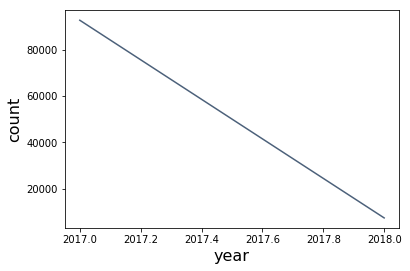

In [11]:
agg_on_year.plot('year', 'count')

Looking just at 2017, what proportion of the total does each type of crime constitute? Use at least one table and at least one plot to support your answer.

In [12]:
agg_by_crime = data.where('year', 2017).group('category')
agg_by_crime['proportion'] = [count / sum(agg_by_crime.column('count')) for count in agg_by_crime.column('count')]
agg_by_crime.sort('proportion', descending=True)

category,count,proportion
LARCENY/THEFT,29699,0.320592
OTHER OFFENSES,10440,0.112697
NON-CRIMINAL,10439,0.112686
ASSAULT,8332,0.0899415
VANDALISM,5916,0.0638615
SUSPICIOUS OCC,3437,0.0371014
BURGLARY,3390,0.0365941
VEHICLE THEFT,3263,0.0352231
WARRANTS,2977,0.0321358
MISSING PERSON,2746,0.0296423


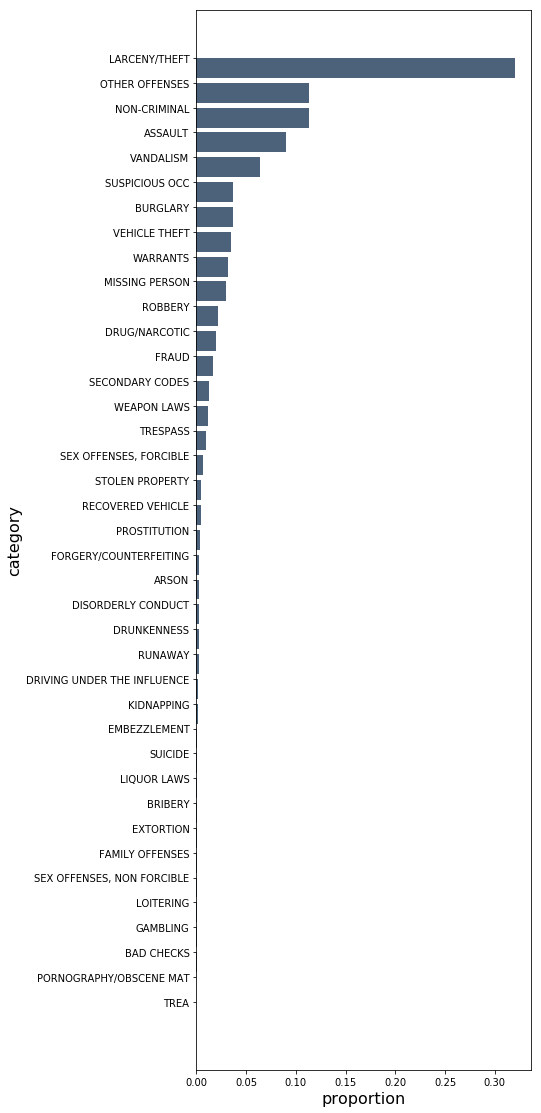

In [13]:
agg_by_crime.sort('count', descending=True).barh('category', 'proportion')

Is there a relationship between day of week, time, and whether an incident occurs? Bonus: Is there a relationship between day/time and particular types of incidents?

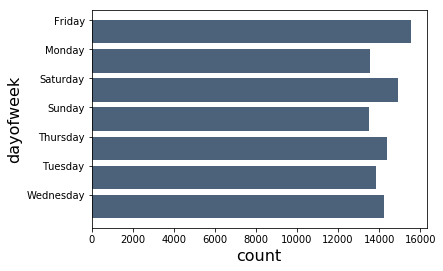

In [14]:
data.group('dayofweek').barh('dayofweek')

In [15]:
# making an hour column that can be grouped on
data['hour'] = [int(t[:2]) for t in data['time']]

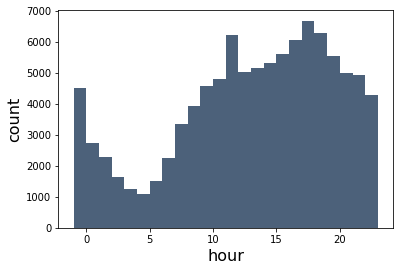

In [16]:
data.group('hour').bar('hour')

#### Bonus: Are there any other interesting relationships in the data?

# 4. Geographic Information Systems (GIS) <a id='gis'></a>

Plot individual incidents in 2017 as points on a map of San Francisco. Does crime seem randomly distributed in space, or do incidents tend to cluster close together? Propose an explanation for your conclusion. Bonus: Shade the points by type of crime.

Hint: Use the `basemap` extension to the `matplotlib` package!

In [17]:
twentyeighteen = data.where('year' == 2018).sample(1000)
twentyeighteen['y'] = twentyeighteen['y'].astype('float')
twentyeighteen['x'] = twentyeighteen['x'].astype('float')

In [18]:
mp = folium.Map(location=[37.7749, -122.4194])
for coords in list(zip(twentyeighteen['y'], twentyeighteen['x'])):
    folium.Marker(
        location=coords
    ).add_to(mp)
mp

In [19]:
from folium.plugins import HeatMap

mp = folium.Map(location=[37.7749, -122.4194])
HeatMap(list(zip(twentyeighteen['y'], twentyeighteen['x']))).add_to(mp)
mp

Merge the incidents data with either a Shapefile or GeoJSON file with information on the boundaries of neighborhoods in San Francisco. 

The neighborhood data is available here: https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods/p5b7-5n3h

The API endpoint: https://data.sfgov.org/resource/xfcw-9evu.json

*.geojson

In [20]:
#import requests
#r = requests.get(url='https://data.sfgov.org/resource/xfcw-9evu.json')

In [21]:
sf_neighborhoods = os.path.join('SF Find Neighborhoods.geojson')
geo_json_data = json.load(open(sf_neighborhoods))

In [22]:
m = folium.Map([37.7749, -122.4194], zoom_start = 12)
m

In [23]:
# might be too big bc won't display
m = folium.Map(
    location=[37.7749, -122.4194], zoom_start = 12
)

folium.GeoJson(geo_json_data
).add_to(m)
m

Construct a choropleth map, coloring in each neighborhood by how many incidents it had in 2018. Bonus: Construct several maps that explore differences by day of week, time of year, time of day, etc.

In [24]:
twentyeighteen = twentyeighteen.to_df()

In [25]:
import geopandas as gpd
import shapely
shapely.speedups.enable()

In [26]:
twentyeighteen_spatial_points = gpd.GeoDataFrame(twentyeighteen.drop(['x', 'y'], axis=1),
                       crs={'init': 'epsg:4326'},
                       geometry=twentyeighteen.apply(lambda row: shapely.geometry.Point((row.x, row.y)), axis=1))

In [27]:
sf_polygons = gpd.GeoDataFrame.from_features(geo_json_data['features'])
sf_polygons.crs = {'init' :'epsg:4326'}

In [28]:
sf_spatial = gpd.sjoin(sf_polygons, twentyeighteen_spatial_points, how="inner", op="intersects")

In [30]:
crime_neighborhood = pd.DataFrame(sf_spatial).reset_index()
crime_neighborhood.head(5)

,index,geometry,highlight,link,name,style,index_right,address,category,date,dayofweek,descript,incidntnum,pddistrict,pdid,resolution,time,year,hour
0,0,(POLYGON ((-122.4934552679999 37.7835181710000...,{},"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff,{},601,100 Block of 26TH AV,LARCENY/THEFT,2017-06-19T00:00:00,Monday,PETTY THEFT FROM UNLOCKED AUTO,170524455,RICHMOND,17052445506221,NONE,20:00,2017,20
1,3,(POLYGON ((-122.4724105299999 37.7873465390000...,{},None,Presidio Terrace,{},293,4200 Block of CALIFORNIA ST,FRAUD,2018-01-10T00:00:00,Wednesday,FRAUDULENT CREDIT APPLICATION,180026372,RICHMOND,18002637209340,NONE,15:20,2018,15
2,3,(POLYGON ((-122.4724105299999 37.7873465390000...,{},None,Presidio Terrace,{},677,100 Block of 5TH AV,OTHER OFFENSES,2017-07-05T00:00:00,Wednesday,"FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR P...",170724774,RICHMOND,17072477409024,NONE,00:01,2017,0
3,4,(POLYGON ((-122.4726257899999 37.7863148060000...,{},http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,{},923,4300 Block of GEARY BL,FRAUD,2017-07-09T00:00:00,Sunday,"ACCESS CARD INFORMATION, THEFT OF",170556931,RICHMOND,17055693109164,NONE,08:00,2017,8
4,4,(POLYGON ((-122.4726257899999 37.7863148060000...,{},http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,{},813,3700 Block of GEARY BL,LARCENY/THEFT,2017-09-20T00:00:00,Wednesday,GRAND THEFT FROM LOCKED AUTO,170770175,RICHMOND,17077017506244,NONE,20:05,2017,20


In [31]:
crime_neighborhood_agg = crime_neighborhood.groupby('name').size().reset_index()
crime_neighborhood_agg.head(5)

,name,0
0,Alamo Square,8
1,Anza Vista,9
2,Apparel City,3
3,Aquatic Park / Ft. Mason,6
4,Ashbury Heights,2


In [32]:
crime_neighborhood_agg.columns = ['neighborhood', 'crimes']
crime_neighborhood_agg.head(5)

,neighborhood,crimes
0,Alamo Square,8
1,Anza Vista,9
2,Apparel City,3
3,Aquatic Park / Ft. Mason,6
4,Ashbury Heights,2


Do you notice any patters? Are there particular neighborhoods where crime concentrates more heavily?

In [39]:
m = folium.Map(
    location=[37.7749, -122.4194], zoom_start = 12
)

m.choropleth(
    geo_data=geo_json_data,
    data=crime_neighborhood_agg,
    columns=['neighborhood', 'crimes'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    threshold_scale=[10, 60, 100, 140],
    highlight=True
    )

m

# 5. Discussion Questions <a id='dq'></a>

Based on the evidence from this lab assignment, why do you think "hot spots" policing became more popular in the last few decades? What are the pros and cons to this kind of approach?

What other sorts of data would help improve your analysis?

In [34]:
def append_and_follow(t, link, n):
    if n == 0:
        print('Next link (if you want to continue)', link)
        return t
    time.sleep(3)
    print(n)
    r = requests.get(link)
    js = r.json()
    return append_and_follow(t.append(Table.from_records(js['value'])), js['@odata.nextLink'], n-1)

starter = Table(('__id', 'address', 'category', 'date', 'dayofweek', 'descript', 'incidntnum', 
                 'location', 'pddistrict', 'pdid', 'resolution', 'time', 'x', 'y'))
starting_url = 'https://data.sfgov.org/api/odata/v4/tmnf-yvry'

c = append_and_follow(starter, starting_url, 6)
c

6
5
4
3
2
1
Next link (if you want to continue) https://data.sfgov.org/api/odata/v4/tmnf-yvry?$skip=51000&$top=10000


__id,address,category,date,dayofweek,descript,incidntnum,location,pddistrict,pdid,resolution,time,x,y
row-vjdt_ms5f_x256,2500 Block of 44TH AV,WARRANTS,2017-06-23T00:00:00Z,Friday,WARRANT ARREST,170513602,"{'latitude': 37.739058349527, 'longitude': -122.50221035 ...",TARAVAL,17051360263010,"ARREST, BOOKED",16:00,-122.502,37.7391
row-5ve7-q6jb-ndtc,20TH ST / CAPP ST,OTHER OFFENSES,2017-10-07T00:00:00Z,Saturday,TRAFFIC VIOLATION,170817802,"{'latitude': 37.758696816649, 'longitude': -122.41796448 ...",MISSION,17081780265015,"ARREST, BOOKED",00:57,-122.418,37.7587
row-fu5d.rqd8-azu8,300 Block of GROVE ST,SUSPICIOUS OCC,2017-10-07T00:00:00Z,Saturday,INVESTIGATIVE DETENTION,170820275,"{'latitude': 37.77786177597, 'longitude': -122.422348143 ...",NORTHERN,17082027564085,NONE,22:24,-122.422,37.7779
row-tr7d.vxg3_nxa8,500 Block of VALENCIA ST,VANDALISM,2013-07-20T00:00:00Z,Saturday,"MALICIOUS MISCHIEF, VANDALISM",130596143,"{'latitude': 37.764097222902, 'longitude': -122.42173850 ...",MISSION,13059614328150,NONE,00:52,-122.422,37.7641
row-hq29.jxms.ubgc,600 Block of POST ST,FRAUD,2013-07-18T00:00:00Z,Thursday,"CREDIT CARD, THEFT OF",130634072,"{'latitude': 37.787645311178, 'longitude': -122.41305644 ...",CENTRAL,13063407209310,"ARREST, BOOKED",17:45,-122.413,37.7876
row-g4zk.3npj.btgw,600 Block of COLUMBUS AV,SUSPICIOUS OCC,2013-07-10T00:00:00Z,Wednesday,INVESTIGATIVE DETENTION,130567796,"{'latitude': 37.800615621369, 'longitude': -122.41053462 ...",CENTRAL,13056779664085,NONE,17:06,-122.411,37.8006
row-ck29_pzy4.q9tk,2500 Block of 41ST AV,OTHER OFFENSES,2011-03-20T00:00:00Z,Sunday,LOST/STOLEN LICENSE PLATE,110232765,"{'latitude': 37.739193640327, 'longitude': -122.49913423 ...",TARAVAL,11023276571010,NONE,20:30,-122.499,37.7392
row-aq3k-7ynf_ikms,800 Block of PRESIDIO AV,NON-CRIMINAL,2013-05-24T00:00:00Z,Friday,SEARCH WARRANT SERVICE,130445283,"{'latitude': 37.783954957771, 'longitude': -122.44620614 ...",RICHMOND,13044528375025,NONE,00:01,-122.446,37.784
row-agnb.3wgq.rzi3,600 Block of VALLEJO ST,NON-CRIMINAL,2015-04-06T00:00:00Z,Monday,AIDED CASE,160283768,"{'latitude': 37.798678125608, 'longitude': -122.40756223 ...",CENTRAL,16028376851040,NONE,13:15,-122.408,37.7987
row-742m-jkj9~i6yh,26TH ST / LUCKY ST,WARRANTS,2013-04-27T00:00:00Z,Saturday,ENROUTE TO OUTSIDE JURISDICTION,130344481,"{'latitude': 37.749338329925, 'longitude': -122.41321519 ...",MISSION,13034448162050,"ARREST, BOOKED",13:21,-122.413,37.7493
